<a href="https://colab.research.google.com/github/ddaviddn/AirQualityRegression/blob/master/Air_Quality_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Air Quality Analysis



---



- Analyze the Air Quality dataset provided in Webcourses. Data was collected hourly in Beijing from January 1st, 2010 to December 31st, 2014. PM2.5 concentration as the response variables.




---







# **a)** Prepare the dataset: 


---




- Preparing the dataset, dropping NA values, dropping 0 values, histogram of pm2.5, log transformation for pm2.5 and histogram for log pm2.5

**Importing the libraries**


In [ ]:
### Importing basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
### Importing different sklearn classes
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import f_regression
from sklearn.metrics import mean_squared_error
### Importing statsmodels 
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.tools.eval_measures import rmse
from statsmodels.api import OLS
from statsmodels.stats.outliers_influence import variance_inflation_factor

sns.set(style="ticks")

**Read dataset into notebook**

In [ ]:
data = pd.read_csv("AirQuality.csv")

data.head()

No  year  month  day  hour  pm2.5  DEWP  TEMP    PRES cbwd    Iws  Is  Ir
0   1  2010      1    1     0    NaN   -21 -11.0  1021.0   NW   1.79   0   0
1   2  2010      1    1     1    NaN   -21 -12.0  1020.0   NW   4.92   0   0
2   3  2010      1    1     2    NaN   -21 -11.0  1019.0   NW   6.71   0   0
3   4  2010      1    1     3    NaN   -21 -14.0  1019.0   NW   9.84   0   0
4   5  2010      1    1     4    NaN   -20 -12.0  1018.0   NW  12.97   0   0

In [ ]:
data.shape

(43824, 13)

In [ ]:
### Counting all null values
data.isnull().sum().head(7)

No          0
year        0
month       0
day         0
hour        0
pm2.5    2067
DEWP        0
dtype: int64

In [ ]:
### Dropping all null values
data = data.dropna(axis = 0)
data.shape

(41757, 13)

**Histogram pm2.5 levels**

In [ ]:
fig = px.histogram(data, x = 'pm2.5')
fig.update_xaxes(range=[0, 400], showline=True, linewidth=1.5, linecolor='grey', mirror=True)
fig.update_yaxes(showline=True, linewidth=1.5, linecolor='grey', mirror=True)
fig.show()

In [ ]:
### Removing values of 0
data = data[data['pm2.5']>0]
data.shape

(41755, 13)

Log transformation for PM2.5

In [ ]:
data['log_pm2.5'] = np.log(data['pm2.5'])
data.head(5)

No  year  month  day  hour  pm2.5  ...    PRES  cbwd   Iws Is  Ir  log_pm2.5
24  25  2010      1    2     0  129.0  ...  1020.0    SE  1.79  0   0   4.859812
25  26  2010      1    2     1  148.0  ...  1020.0    SE  2.68  0   0   4.997212
26  27  2010      1    2     2  159.0  ...  1021.0    SE  3.57  0   0   5.068904
27  28  2010      1    2     3  181.0  ...  1022.0    SE  5.36  1   0   5.198497
28  29  2010      1    2     4  138.0  ...  1022.0    SE  6.25  2   0   4.927254

[5 rows x 14 columns]

**Histogram for log(pm2.5)**

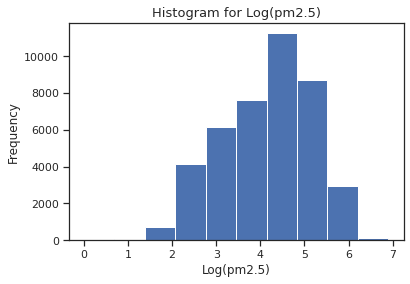

In [ ]:
# px.histogram(log_data, x = 'pm2.5', nbins= 25)
plt.hist(data['log_pm2.5'])
plt.xlabel('Log(pm2.5)')
plt.ylabel('Frequency')
plt.title('Histogram for Log(pm2.5)', size = 13)
plt.show()




# **b)** Do an exploratory analysis on the data. Make plots or perform calculations to investigate the following questions:


---


- Finding relationships between different time variables with pm2.5 concentration

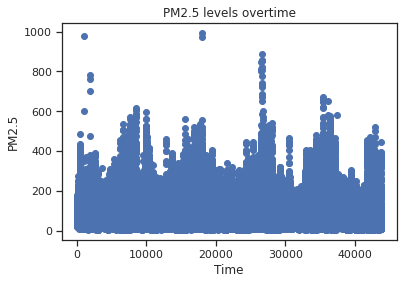

In [ ]:
### Scatterplot of pm2.5 levels overtime, no general trends, but there are high
### concentrations of pm2.5 every once in awhile

plt.scatter(x = data['No'], y = data['pm2.5'])
plt.xlabel('Time')
plt.ylabel('PM2.5')
plt.title('PM2.5 levels overtime')
plt.show()

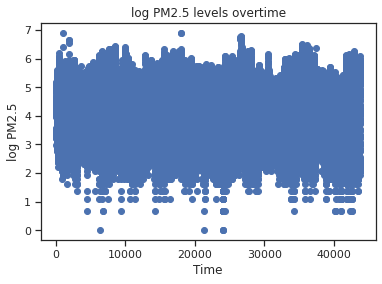

In [ ]:
### Scatterplot of log pm2.5 levels overtime, which seems cyclical

plt.scatter(x = data['No'], y = data['log_pm2.5'])
plt.xlabel('Time')
plt.ylabel('log PM2.5')
plt.title('log PM2.5 levels overtime')
plt.show()

In [ ]:
def plotting(x, y):
  plt.scatter(x = x, y = y)
  return plt.show()

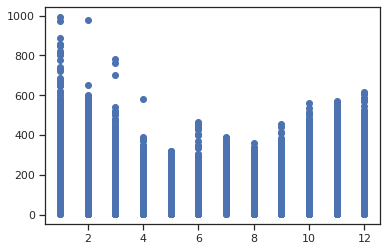

In [ ]:
### Hard to notice any relationship between pm2.5 and time, let's try to plot 
### against the mean pm2.5 levels

plotting(data['month'], data['pm2.5'])
plt.show()

In [ ]:
month = data.groupby('month', as_index=False)['pm2.5'].mean()
day = data.groupby('day', as_index=False)['pm2.5'].mean()
hour = data.groupby('hour', as_index=False)['pm2.5'].mean()

**Month vs. Mean of PM2.5 levels**

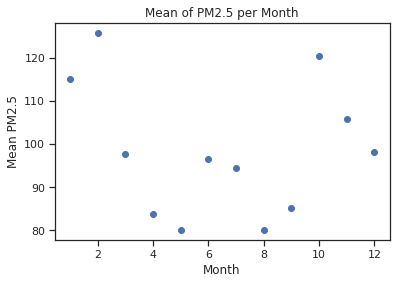

In [ ]:
plt.xlabel('Month')
plt.ylabel('Mean PM2.5')
plt.title('Mean of PM2.5 per Month')
plotting(month.iloc[:,0].values, month.iloc[:,1].values)

**Day vs. Mean of PM2.5 levels**

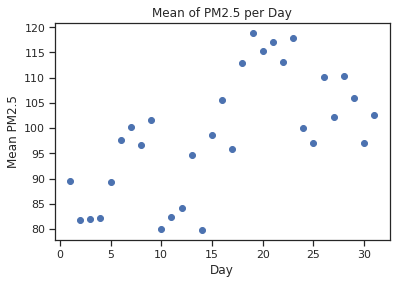

In [ ]:
plt.xlabel('Day')
plt.ylabel('Mean PM2.5')
plt.title('Mean of PM2.5 per Day')
plotting(day.iloc[:,0].values, day.iloc[:,1].values)

**Hour vs. Mean of PM2.5 levels**

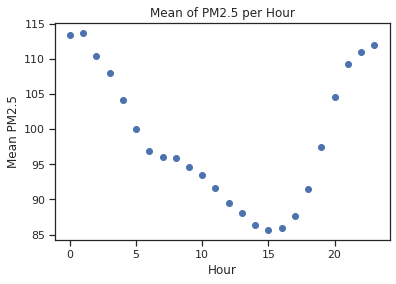

In [ ]:
plt.xlabel('Hour')
plt.ylabel('Mean PM2.5')
plt.title('Mean of PM2.5 per Hour')
plotting(hour.iloc[:,0].values, hour.iloc[:,1].values)


# **b iii)** Are environmental factors associated with greater or less pollution? 

# **iv)** Are there relations between the environmental factors?


---



In [ ]:
fig = px.scatter_matrix(data,
    dimensions=["log_pm2.5","DEWP",'TEMP','PRES'], opacity=0.25)
fig.update_traces(diagonal_visible=False)
fig.show()

In [ ]:
fig = px.scatter_matrix(data,
    dimensions=['log_pm2.5','cbwd','Iws','Is','Ir'], opacity = 0.25)
fig.update_traces(diagonal_visible=False)
fig.show()

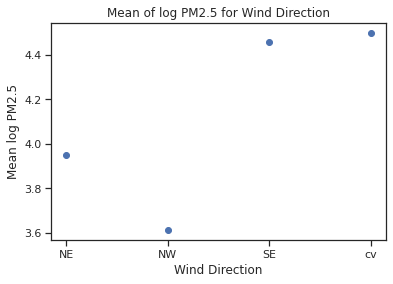

In [ ]:
cbwd = data.groupby('cbwd', as_index=False)['log_pm2.5'].mean()

plt.xlabel('Wind Direction')
plt.ylabel('Mean log PM2.5')
plt.title('Mean of log PM2.5 for Wind Direction')
plotting(cbwd.iloc[:,0].values, cbwd.iloc[:,1].values)

In [ ]:
fig = px.scatter_matrix(data, dimensions=['pm2.5','Is','Ir'], opacity = 0.25)
fig.update_traces(diagonal_visible=False)
fig.show()

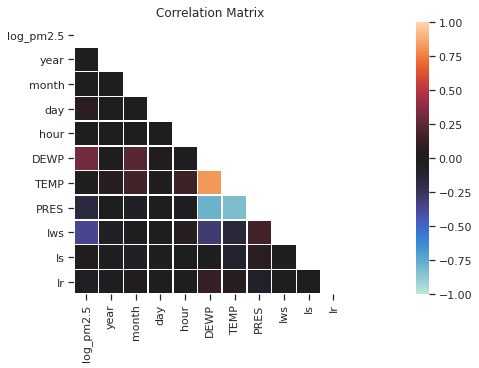

In [ ]:
plt.figure(figsize=(25,5))
plt.title("Correlation Matrix")
matrix = np.triu(data[['log_pm2.5','year', 'month', 'day', 'hour', 'DEWP', 'TEMP', 'PRES', 'cbwd', 'Iws', 'Is', 'Ir']].corr())
sns.heatmap(data[['log_pm2.5','year', 'month', 'day', 'hour', 'DEWP', 'TEMP', 'PRES', 'cbwd', 'Iws', 'Is', 'Ir']].corr(), 
            linewidths=0.5, linecolor='white', vmin=-1, vmax=1, center= 0, square=True, mask = matrix)
plt.show()

# **c)** Perform a transformation on month, day, and hour that is appropriate for linear regression with cyclic variables:



---


> *→ (cos(2πx/τ ),sin(2πx/τ ))*




In [ ]:
data['Cos_month'] = np.cos(2*np.pi*data['month']/12)
data['Sin_month'] = np.sin(2*np.pi*data['month']/12)
data['Cos_day'] = np.cos(2*np.pi*data['day']/30)
data['Sin_day'] = np.sin(2*np.pi*data['day']/30)
data['Cos_hour'] = np.cos(2*np.pi*data['hour']/24)
data['Sin_hour'] = np.sin(2*np.pi*data['hour']/24)
data.head()

No  year  month  day  ...   Cos_day   Sin_day  Cos_hour  Sin_hour
24  25  2010      1    2  ...  0.913545  0.406737  1.000000  0.000000
25  26  2010      1    2  ...  0.913545  0.406737  0.965926  0.258819
26  27  2010      1    2  ...  0.913545  0.406737  0.866025  0.500000
27  28  2010      1    2  ...  0.913545  0.406737  0.707107  0.707107
28  29  2010      1    2  ...  0.913545  0.406737  0.500000  0.866025

[5 rows x 20 columns]

**Linear Regression of Regular Month vs. log pm2.5**

In [ ]:
print("R-Squared for Linear Regression with month vs. log pm2.5:")

reg = LinearRegression()
reg.fit(np.array(data['month']).reshape(-1,1), data['log_pm2.5'])

print(reg.score(np.array(data['month']).reshape(-1,1), data['log_pm2.5']))
y_pred1 = reg.predict(np.array(data['month']).reshape(-1,1))

print(f"\nThe MSE for this regression is:{mean_squared_error(data['log_pm2.5'],y_pred1)}")

R-Squared for Linear Regression with month vs. log pm2.5:
0.001211836490105811

The MSE for this regression is:1.0670472943897633


**Linear Regression of Sin/Cos Month vs. log pm2.5**


In [ ]:
print("R-Squared for Sin/Cos Linear Regression with month vs. log pm2.5:")

reg = LinearRegression()
reg.fit(data[['Cos_month','Sin_month']], data['log_pm2.5'])

print(reg.score(data[['Cos_month','Sin_month']], data['log_pm2.5']))
y_pred = reg.predict(data[['Cos_month','Sin_month']])

print(f"\nThe MSE for this regression is:{mean_squared_error(data['log_pm2.5'],y_pred)}")

R-Squared for Sin/Cos Linear Regression with month vs. log pm2.5:
0.000808931071774044

The MSE for this regression is:1.0674777351501095


**Removing the original coding of cyclic variables**

In [ ]:
data2 = data[['No', 'year', 'DEWP', 'TEMP', 'PRES','cbwd', 'Iws', 'Is', 'Ir', 
            'Cos_month', 'Sin_month', 'Cos_day', 'Sin_day', 'Cos_hour', 'Sin_hour',
            'log_pm2.5']]
data2 = pd.get_dummies(data2, drop_first = True)

**Splitting the data into training and testing set**

In [ ]:
x = data2.drop('log_pm2.5', axis = 1)
y = data2['log_pm2.5']

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25,random_state=0)

x_train.head()

No  year  DEWP  TEMP  ...  Sin_hour  cbwd_NW  cbwd_SE  cbwd_cv
43636  43637  2014   -15  -3.0  ...  0.866025        1        0        0
5596    5597  2010    15  19.0  ...  0.866025        0        0        0
40229  40230  2014    24  26.0  ...  0.965926        1        0        0
7450    7451  2010    -4  13.0  ...  0.500000        1        0        0
24761  24762  2012    -1  12.0  ... -0.965926        0        1        0

[5 rows x 17 columns]

# Creating the linear model to predict log pm2.5


---



Linear Regression with statsmodel api

In [ ]:
x_train = sm.add_constant(x_train)
OLS(y_train,x_train.astype(float)).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_pm2.5   R-squared:                       0.529
Model:                            OLS   Adj. R-squared:                  0.529
Method:                 Least Squares   F-statistic:                     2067.
Date:                Fri, 18 Sep 2020   Prob (F-statistic):               0.00
Time:                        05:21:45   Log-Likelihood:                -33725.
No. Observations:               31316   AIC:                         6.749e+04
Df Residuals:                   31298   BIC:                         6.764e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        577.8556     47.287     12.220      0.000     485.171     670.540
No          2.914e-05   2.68e-06     10.891      0.000    2.39e-05    3.44e-05
year          -0.2755      0.024    -11.681      0.000      -0.322      -0.229
DEWP           0.0940      0.001    123.478      0.000       0.093       0.095
TEMP          -0.0399      0.001    -35.199      0.000      -0.042      -0.038
PRES          -0.0196      0.001    -24.342      0.000      -0.021      -0.018
Iws           -0.0025   9.29e-05    -26.411      0.000      -0.003      -0.002
Is            -0.0487      0.005     -9.535      0.000      -0.059      -0.039
Ir            -0.0739      0.003    -25.694      0.000      -0.080      -0.068
Cos_month      1.0612      0.017     63.080      0.000       1.028       1.094
Sin_month      0.9467      0.014     67.905      0.000       0.919       0.974
Cos_day        0.0022      0.006      0.390      0.697      -0.009       0.013
Sin_day       -0.0513      0.006     -8.867      0.000      -0.063      -0.040
Cos_hour      -0.0556      0.007     -8.259      0.000      -0.069      -0.042
Sin_hour      -0.0756      0.007    -10.794      0.000      -0.089      -0.062
cbwd_NW       -0.0649      0.014     -4.485      0.000      -0.093      -0.037
cbwd_SE        0.3811      0.014     26.457      0.000       0.353       0.409
cbwd_cv        0.3096      0.015     20.850      0.000       0.281       0.339
==============================================================================
Omnibus:                      461.706   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              560.299
Skew:                          -0.233   Prob(JB):                    2.15e-122
Kurtosis:                       3.461   Cond. No.                     3.03e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.03e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
# Kinda a fail xD 170 variables and hard to tell which interaction is with what

# poly = PolynomialFeatures(degree=2, interaction_only=True)
# practice_x = poly.fit_transform(x_train[['year', 'DEWP', 'TEMP', 'PRES', 'Iws', 'Is', 'Ir', 'Cos_month',
#        'Sin_month', 'Cos_day', 'Sin_day', 'Cos_hour', 'Sin_hour', 'cbwd_NW','cbwd_SE', 'cbwd_cv']])

# practice_x = sm.add_constant(practice_x)
# OLS(y_train, practice_x.astype(float)).fit().summary()

Checking the outputs with sklearn's api

In [ ]:
### Drop constant column, as sklearn already has a constant added to lin reg
x_train = x_train.drop('const', axis = 1)

### linear regression object
reg_full = LinearRegression()
reg_full.fit(x_train, y_train)

### Finding p-value, coef from the linear regression
p = f_regression(x_train, y_train)[1].round(5)
coef = reg_full.coef_

### Outputting to a pandas dataframe for readability
reg_summary = pd.DataFrame(x_train.columns.values, columns = ['Features'])
reg_summary['Coefficients'] = coef.round(3)
reg_summary['P-Values'] = p.round(3)
print(f"The R-squared value is: {reg_full.score(x_train, y_train).round(3)}")
print(f"\n{str(reg_summary)}")

The R-squared value is: 0.529

     Features  Coefficients  P-Values
0          No         0.000     0.000
1        year        -0.275     0.000
2        DEWP         0.094     0.000
3        TEMP        -0.040     0.001
4        PRES        -0.020     0.000
5         Iws        -0.002     0.000
6          Is        -0.049     0.000
7          Ir        -0.074     0.000
8   Cos_month         1.061     0.000
9   Sin_month         0.947     0.791
10    Cos_day         0.002     0.619
11    Sin_day        -0.051     0.000
12   Cos_hour        -0.056     0.000
13   Sin_hour        -0.076     0.000
14    cbwd_NW        -0.065     0.000
15    cbwd_SE         0.381     0.000
16    cbwd_cv         0.310     0.000


In [ ]:
### Checking for multi-collinearity with variance inflation factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(x_train.values, i) for i in range(x_train.shape[1])]
vif["features"] = x_train.columns
vif.sort_values('VIF Factor', ascending = False).head(7)

VIF Factor   features
1   41590.291136       year
4   40948.239818       PRES
3      23.954242       TEMP
8       8.676439  Cos_month
2       7.470598       DEWP
15      4.493678    cbwd_SE
0       4.431542         No

In [ ]:
# Dropping extremely high VIF values and "No" column

x_train_collinearity = x_train.drop('year', axis = 1)
x_train_collinearity = x_train_collinearity.drop('PRES', axis = 1)
x_train_collinearity = x_train_collinearity.drop('No', axis = 1)
x_train_collinearity.head(3)

DEWP  TEMP    Iws  Is  Ir  ...  Cos_hour  Sin_hour  cbwd_NW  cbwd_SE  cbwd_cv
43636   -15  -3.0  15.19   0   0  ...  0.500000  0.866025        1        0        0
5596     15  19.0  12.96   0   0  ...  0.500000  0.866025        0        0        0
40229    24  26.0   2.68   0   0  ...  0.258819  0.965926        1        0        0

[3 rows x 14 columns]

Creating an optimal dataset to work with later, using VIF and prior linear regression for cutting down the unnecessary variables

In [ ]:
data_condense = data2.copy()
### Adding variables that haven't been dropped by VIF/linear regression results
data_condense = data2[['DEWP', 'TEMP', 'Iws', 'Is', 'Ir', 'Cos_month', 'Sin_month', 
                       'Cos_day','Sin_day', 'Cos_hour', 'Sin_hour', 
                       'cbwd_NW', 'cbwd_SE', 'cbwd_cv']]
### Adding the log pm2.5 levels column
data_condense['log_pm2.5'] = data2['log_pm2.5']
data_condense.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



DEWP  TEMP   Iws  Is  Ir  ...  Sin_hour  cbwd_NW  cbwd_SE  cbwd_cv  log_pm2.5
24   -16  -4.0  1.79   0   0  ...  0.000000        0        1        0   4.859812
25   -15  -4.0  2.68   0   0  ...  0.258819        0        1        0   4.997212
26   -11  -5.0  3.57   0   0  ...  0.500000        0        1        0   5.068904
27    -7  -5.0  5.36   1   0  ...  0.707107        0        1        0   5.198497
28    -7  -5.0  6.25   2   0  ...  0.866025        0        1        0   4.927254

[5 rows x 15 columns]

# Narrowing down the predictors for linear regression model


---


- Plotting correlation matrix and figuring out which variables has the greatest correlations with log pm2.5

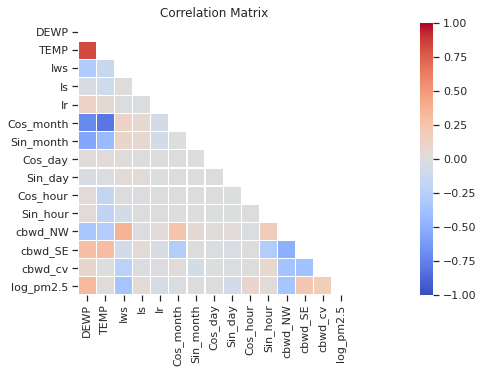

In [ ]:
### Figuring out which predictors will be most meaningful for predicting pm2.5
plt.figure(figsize=(25,5))
plt.title("Correlation Matrix")
matrix = np.triu(data_condense.corr())
sns.heatmap(data_condense.corr(), linewidths=0.25, linecolor='white', vmin=-1, 
            vmax=1, center= 0, square=True, mask = matrix, cmap = 'coolwarm')
plt.show()

In [ ]:
### Creating x_train_reduced from the combination of x_train and my chosen variables
x_train_reduced = x_train[['DEWP','Iws','Sin_day','Cos_hour','cbwd_NW','cbwd_SE','cbwd_cv']]

### Running the statsmodel OLS linear regression
x_train_reduced = sm.add_constant(x_train_reduced)
OLS(y_train, x_train_reduced.astype(float)).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_pm2.5   R-squared:                       0.242
Model:                            OLS   Adj. R-squared:                  0.242
Method:                 Least Squares   F-statistic:                     1429.
Date:                Fri, 18 Sep 2020   Prob (F-statistic):               0.00
Time:                        05:30:49   Log-Likelihood:                -41167.
No. Observations:               31316   AIC:                         8.235e+04
Df Residuals:                   31308   BIC:                         8.242e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.9803      0.015    263.206      0.000       3.951       4.010
DEWP           0.0109      0.000     28.088      0.000       0.010       0.012
Iws           -0.0049      0.000    -42.567      0.000      -0.005      -0.005
Sin_day       -0.0957      0.007    -13.188      0.000      -0.110      -0.081
Cos_hour       0.1297      0.007     17.954      0.000       0.116       0.144
cbwd_NW       -0.0766      0.018     -4.206      0.000      -0.112      -0.041
cbwd_SE        0.4897      0.018     27.717      0.000       0.455       0.524
cbwd_cv        0.4797      0.019     25.636      0.000       0.443       0.516
==============================================================================
Omnibus:                       75.781   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               73.733
Skew:                          -0.103   Prob(JB):                     9.75e-17
Kurtosis:                       2.880   Cond. No.                         338.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
### Drop constant column, as sklearn already has a constant added to lin reg
x_train_reduced = x_train_reduced.drop('const', axis = 1)

### linear regression object
reg_reduced = LinearRegression()
reg_reduced.fit(x_train_reduced, y_train)

### Finding p-value, coef from the linear regression
p = f_regression(x_train_reduced, y_train)[1].round(5)
coef = reg_reduced.coef_

### Outputting to a pandas dataframe for readability
reg_summary2 = pd.DataFrame(x_train_reduced.columns.values, columns = ['Features'])
reg_summary2['Coefficients'] = coef.round(3)
reg_summary2['P-Values'] = p.round(3)
print(f"The R-squared value is: {reg_reduced.score(x_train_reduced, y_train).round(3)}")
print(f"\n{str(reg_summary2)}")

The R-squared value is: 0.242

   Features  Coefficients  P-Values
0      DEWP         0.011       0.0
1       Iws        -0.005       0.0
2   Sin_day        -0.096       0.0
3  Cos_hour         0.130       0.0
4   cbwd_NW        -0.077       0.0
5   cbwd_SE         0.490       0.0
6   cbwd_cv         0.480       0.0


# Calculating the MSE for Full model vs. Reduced Model on validation set. 


---


- Comparing the 2 MSE of full model vs. Reduced Model

In [ ]:
# Including R-squared for full model
print("R-Squared for the Full Linear Regression on validation set:")
print(reg_full.score(x_test, y_test).round(3))

# Finding MSE by sklearn metrics (y_true, y_pred) for full model
print(f"\nThe MSE for the full regression is:{mean_squared_error(y_test,reg_full.predict(x_test))}")


R-Squared for the Full Linear Regression on validation set:
0.529

The MSE for the full regression is:0.5029788447288053


In [ ]:
# Including R-squared for reduced model
print("R-Squared for the Reduced Linear Regression on validation set:")
print(reg_reduced.score(x_test[['DEWP','Iws','Sin_day','Cos_hour','cbwd_NW','cbwd_SE','cbwd_cv']], y_).round(3))

# Finding MSE by sklearn metrics (y_true, y_pred) for reduced model
print(f"\nThe MSE for the full regression is:{mean_squared_error(y_test,reg_reduced.predict(x_test[['DEWP','Iws','Sin_day','Cos_hour','cbwd_NW','cbwd_SE','cbwd_cv']]))}")


R-Squared for the Reduced Linear Regression on validation set:
0.242

The MSE for the full regression is:0.8007413885201635


#More Exploratory Data Analysis on the reduced variables


---



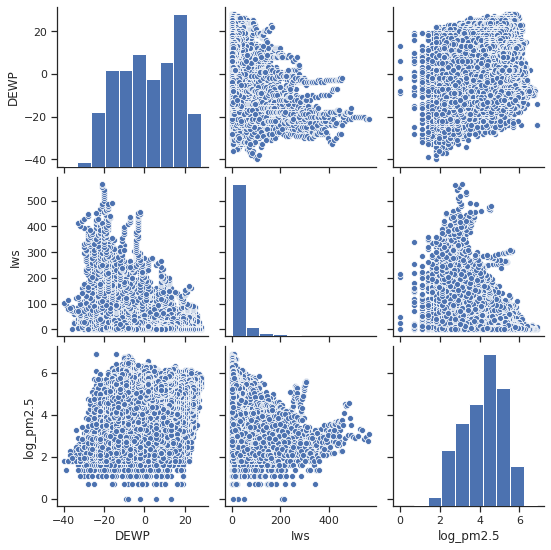

In [ ]:
### More visible scatterplot matrix between DEWP, IWS, and log pm2.5
sns.pairplot(data[['DEWP', 'Iws', 'log_pm2.5']])
plt.show()

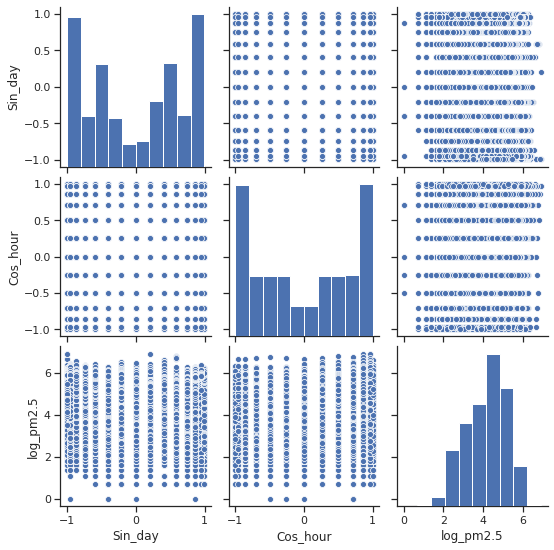

In [ ]:
### Visible scatterplot matrix between Sin day, cos hour, and log pm2.5
sns.pairplot(data[['Sin_day', 'Cos_hour', 'log_pm2.5']])
plt.show()